In [7]:
import os
import glob
import numpy as np
import xarray as xr
import pandas as pd
import gsw

# Obtém o diretório atual onde está o notebook
pasta_atual = os.path.dirname(os.path.abspath('__file__'))

# Define o caminho para a pasta onde estão os arquivos
pasta_dados_1995_2014 = os.path.join(pasta_atual,  '1995_2014')
pasta_dados_1955_1974 = os.path.join(pasta_atual, '1955_1974')

# Certifique-se de que os diretórios de resultados existem
pasta_resultados = os.path.join(pasta_atual, 'Diferencas_Historicas')
if not os.path.exists(pasta_resultados):
    os.makedirs(pasta_resultados)

# Escolhe as latitudes desejadas
latitudes = [-40, -30, -20, -10, -5]

# Função para mínimo de salinidade
def sal_min(ds):
    idxmin_lev = ds['sa'].argmin(dim='lev')
    sa_min = ds['sa'].min(dim='lev')
    thetao_at_sa_min = ds['thetao'].isel(lev=idxmin_lev)
    lev_at_sa_min = ds['lev'].isel(lev=idxmin_lev)
    sigma0 = gsw.sigma0(sa_min, thetao_at_sa_min)
    return sa_min, thetao_at_sa_min, lev_at_sa_min, sigma0

# Função para comparar dois períodos históricos
def comparar_dados_historicos(latitudes):

    arquivos_hist_periodo1 = glob.glob(os.path.join(pasta_dados_1955_1974, f'*.nc'))

    for arquivo_hist_periodo1 in arquivos_hist_periodo1:
        resultados = []
        nome_arquivo = os.path.basename(arquivo_hist_periodo1)
        modelo = os.path.splitext(nome_arquivo)[0].split('.')[2]

        # Construir o caminho do arquivo correspondente no segundo período
        arquivo_hist_periodo2 = os.path.join(pasta_dados_1995_2014, nome_arquivo)

        # Verificar se o arquivo correspondente existe
        if not os.path.exists(arquivo_hist_periodo2):
            continue

        ds_hist_periodo1 = xr.open_dataset(arquivo_hist_periodo1)
        ds_hist_periodo2 = xr.open_dataset(arquivo_hist_periodo2)
        ds_hist_periodo1 = ds_hist_periodo1.sel(lev=slice(50, 1900))#.interp(lev=np.arange(100, 1500, 1), method="linear")
        ds_hist_periodo2 = ds_hist_periodo2.sel(lev=slice(50, 1900))#.interp(lev=np.arange(100, 1500, 1), method="linear")

        for lat in latitudes:
            sa_hist_periodo1, t_hist_periodo1, lev_hist_periodo1, sigma_hist_periodo1 = sal_min(ds_hist_periodo1.sel(lat=lat, method='nearest'))
            sa_hist_periodo2, t_hist_periodo2, lev_hist_periodo2, sigma_hist_periodo2 = sal_min(ds_hist_periodo2.sel(lat=lat, method='nearest'))

            diff_s = sa_hist_periodo2 - sa_hist_periodo1
            diff_t = t_hist_periodo2 - t_hist_periodo1
            diff_lev = lev_hist_periodo2 - lev_hist_periodo1
            diff_sigma = sigma_hist_periodo2 - sigma_hist_periodo1

            resultados.append({
            'Latitude': lat,
            f'Diferença de Salinidade': diff_s.values,
            f'Diferença de Temperatura': diff_t.values,
            f'Profundidade_(1955 1974)': lev_hist_periodo1.values,
            f'Diferença_de_Profundidade': diff_lev.values,
            f'Sigma0_(1955 1974)': sigma_hist_periodo1.values,
            f'Diferença Sigma0': diff_sigma.values
            })
        resultados = pd.DataFrame(resultados)
        caminho_resultado = os.path.join(pasta_resultados, f'resultados_Diferenças_{modelo}.csv')
        resultados.to_csv(caminho_resultado, index=False)
                
# Comparar os dados de dois períodos históricos
comparar_dados_historicos(latitudes)


In [8]:
import os
import glob
import numpy as np
import xarray as xr
import pandas as pd
import gsw

# Obtém o diretório atual onde está o notebook
pasta_atual = os.path.dirname(os.path.abspath('__file__'))

#Pasta para os resultados
pasta_resultados = os.path.join(pasta_atual, 'Diferencas_Historicas')

# Escolhe as latitudes desejadas
latitudes = [-40, -30, -20, -10, -5]

# Função para mínimo de salinidade
def sal_min(ds):
    idxmin_lev = ds['s_an'].argmin(dim='depth')
    sa_min = ds['s_an'].min(dim='depth')
    thetao_at_sa_min = ds['c_t'].isel(depth=idxmin_lev)
    lev_at_sa_min = ds['depth'].isel(depth=idxmin_lev)
    sigma0 = gsw.sigma0(sa_min, thetao_at_sa_min)
    return sa_min, thetao_at_sa_min, lev_at_sa_min, sigma0



woa_periodo1 = xr.open_dataset('/Users/schimidel/Documents/Pastas_Iniciação/Tendências_WOA/h_mean_woa.nc')
woa_periodo2 = xr.open_dataset('/Users/schimidel/Documents/Pastas_Iniciação/Tendências_WOA/f_mean_woa.nc')
woa_periodo1 = woa_periodo1.interp(depth=np.arange(100, 1500, 1), method="linear")
woa_periodo2 = woa_periodo2.interp(depth=np.arange(100, 1500, 1), method="linear")

resultados = []

for lat in latitudes:
    sa_hist_periodo1, t_hist_periodo1, lev_hist_periodo1, sigma_hist_periodo1 = sal_min(woa_periodo1.sel(lat=lat, method='nearest'))
    sa_hist_periodo2, t_hist_periodo2, lev_hist_periodo2, sigma_hist_periodo2 = sal_min(woa_periodo2.sel(lat=lat, method='nearest'))

    diff_s = sa_hist_periodo2 - sa_hist_periodo1
    diff_t = t_hist_periodo2 - t_hist_periodo1
    diff_lev = lev_hist_periodo2 - lev_hist_periodo1
    diff_sigma = sigma_hist_periodo2 - sigma_hist_periodo1

    resultados.append({
    'Latitude': lat,
    f'Diferença de Salinidade': diff_s.values,
    f'Diferença de Temperatura': diff_t.values,
    f'Profundidade_(1955 1974)': lev_hist_periodo1.values,
    f'Diferença_de_Profundidade': diff_lev.values,
    f'Sigma0_(1955 1974)': sigma_hist_periodo1.values,
    f'Diferença Sigma0': diff_sigma.values
    })

resultados = pd.DataFrame(resultados)
caminho_resultado = os.path.join(pasta_resultados, f'resultados_Diferenças_WOA.csv')
resultados.to_csv(caminho_resultado, index=False)


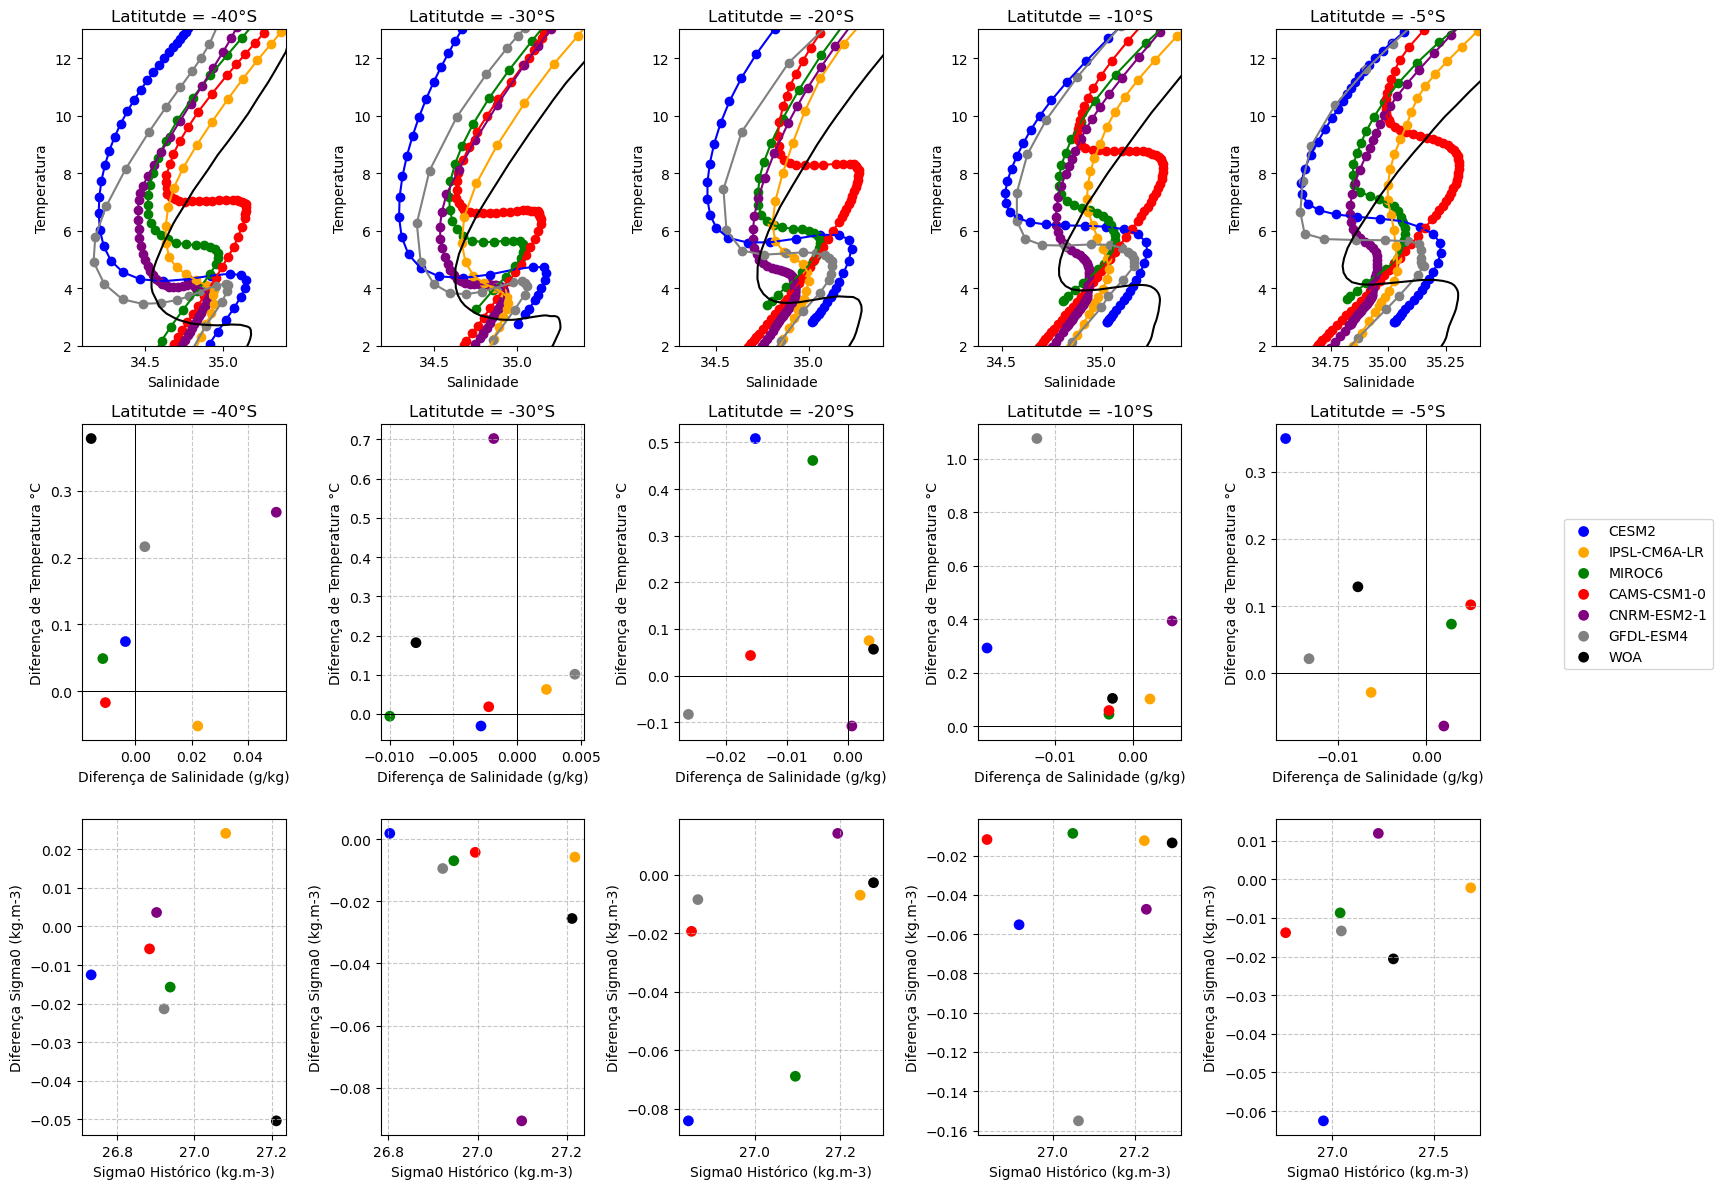

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import os
import glob
import numpy as np
import xarray as xr
import pandas as pd
import gsw

#Define o tamanho de algumas variáveis: 
s = 60

# Lista de modelos
modelos = ['CESM2', 'IPSL-CM6A-LR', 'MIROC6', 'CAMS-CSM1-0', 'CNRM-ESM2-1', 'GFDL-ESM4', 'WOA']  # Substitua pelos nomes reais dos modelos

# Dicionário para associar cada modelo a uma cor específica
cores_modelos = {
    'CESM2': 'blue',
    'IPSL-CM6A-LR': 'orange',
    'MIROC6': 'green',
    'CAMS-CSM1-0': 'red',
    'CNRM-ESM2-1': 'purple',
    'GFDL-ESM4' : 'gray',
    'WOA' : 'black'
}

# Dicionário para armazenar os DataFrames de cada modelo 
dataframes = {}

# Carregar DataFrames de cada modelo 
for modelo in modelos:
    nome_arquivo = f"Diferencas_Historicas/resultados_Diferenças_{modelo}.csv"
    dataframes[modelo] = pd.read_csv(nome_arquivo)

# Lista de latitudes desejadas
latitudes_desejadas = [-40, -30, -20, -10, -5]  # Adicione ou remova latitudes conforme necessário

#Plotagem do diagrama TS
# Obtém o diretório atual onde está o notebook
pasta_atual = os.path.dirname(os.path.abspath('__file__'))

# Define o caminho para a pasta onde estão os arquivos
pasta_dados = os.path.join(pasta_atual, 'Dados_SSP_e_Hist')

# Usa a biblioteca glob para obter todos os arquivos NetCDF na pasta
arquivos = glob.glob(os.path.join(pasta_dados, '*.nc'))

# Filtra os arquivos para incluir apenas aqueles com "historical" no nome
arquivos_hist = [arquivo for arquivo in arquivos if "historical" in arquivo]

latitudes = [-40, -30, -20, -10, -5]

# Configuração dos subplots
num_linhas = 3
num_colunas = len(latitudes_desejadas)

# Criar subplots
fig, axs = plt.subplots(num_linhas, num_colunas, figsize=(15, 12))

# Dicionário para armazenar os dados de cada modelo
dados_modelos = {}

# Plotagem dos diagramas TS (primeira linha)
for j, latitude_desejada in enumerate(latitudes_desejadas):
    ax_ts = axs[0, j]
    
    for arquivo in arquivos_hist:
        ds = xr.open_dataset(arquivo)
        modelo = os.path.splitext(arquivo)[0].split('.')[2]
        #levels = np.arange(0, 4000, 1)
        #ds = ds.interp(lev=levels)
        thetao = ds.sel(lat=latitude_desejada, method="nearest").thetao.values
        sa = ds.sel(lat=latitude_desejada, method="nearest").sa.values
        ax_ts.plot(sa, thetao, color=cores_modelos[modelo])# Usar o dicionário de mapeamento
        ax_ts.scatter(sa, thetao, color=cores_modelos[modelo])
    
    #Adiciona os dados do WOA
    woa = xr.open_dataset("/Users/schimidel/Documents/Pastas_Iniciação/Tendências_WOA/woa_mean.nc")
    levels = np.arange(0, 4000, 1)
    woa = woa.interp(depth=levels)
    c_t = woa.sel(lat=latitude_desejada).c_t.values
    s_an = woa.sel(lat=latitude_desejada).s_an.values
    ax_ts.plot(s_an, c_t, color="black")
    ax_ts.set_title(f"Latitutde = {latitude_desejada}°S")
    ax_ts.set(xlabel='Salinidade', ylabel='Temperatura')

    #Define os eixos
    xlim = ax_ts.get_xlim()
    ylim = ax_ts.get_ylim()
    #Define o xlim e ylim das figuras dos diagramas TS
    ax_ts.set_xlim(xlim[0], 35.4)
    ax_ts.set_ylim(2, 13)
    
    
# Loop através de cada latitude para plotar as diferenças de temperatura e salinidade, e a diferença de sigma 0
grandezas = ['Temperatura e Salinidade', 'Sigma0']

for i, grandeza in enumerate(grandezas):
    for j, latitude_desejada in enumerate(latitudes_desejadas):
        ax = axs[i + 1, j]  # Usar i + 1 para evitar sobreposição com a primeira linha

        handles = []  # Lista para armazenar handles dos marcadores preenchidos

        for modelo in modelos:
            df = dataframes[modelo]

            if grandeza == 'Temperatura e Salinidade':
                # Scatter plot para ssp585 (marcadores preenchidos)
                scatter = ax.scatter(
                    df[df['Latitude'] == latitude_desejada]['Diferença de Salinidade'],
                    df[df['Latitude'] == latitude_desejada]['Diferença de Temperatura'],
                    label=f"{modelo}", marker='o', facecolors=cores_modelos[modelo], edgecolors='none', s=s)

                # Destacar linha 0 nos eixos x e y
                ax.axhline(y=0, color='black', linestyle='-', linewidth=0.7)
                ax.axvline(x=0, color='black', linestyle='-', linewidth=0.7)
                ax.set_title(f"Latitutde = {latitude_desejada}°S")
                ax.set(xlabel='Diferença de Salinidade (g/kg)', ylabel="Diferença de Temperatura °C")

            elif grandeza == 'Sigma0':
                # Scatter plot para ssp585 (marcadores preenchidos)
                scatter = ax.scatter(
                    df[df['Latitude'] == latitude_desejada]['Sigma0_(1955 1974)'],
                    df[df['Latitude'] == latitude_desejada]['Diferença Sigma0'],
                    label=f"{modelo}", marker='o', facecolors=cores_modelos[modelo], edgecolors='none', s=s)

                ax.set(xlabel='Sigma0 Histórico (kg.m-3)', ylabel="Diferença Sigma0 (kg.m-3)")

            # Adicionar handles dos marcadores preenchidos à lista
            handles.append(scatter)

        # Adicionar grid
        ax.grid(True, linestyle='--', alpha=0.7)

# Ajustar layout para evitar sobreposição de rótulos
plt.tight_layout()
fig.legend(handles=handles, labels=[f"{modelo}" for modelo in modelos], loc='center right',
           bbox_to_anchor=(1.15, 0.5))
plt.savefig("Figuras/Diagramas_Ts_Historico.png", bbox_inches='tight')
plt.show()